In [37]:
suppressMessages(library(readr))
suppressMessages(library(tidyr))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
library('forecast')
library('tseries')

In [6]:
data <- read_csv("denguecases.csv")

Parsed with column specification:
cols(
  Month = col_character(),
  Year = col_integer(),
  Region = col_character(),
  Dengue_Cases = col_double()
)


In [7]:
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1836 obs. of  4 variables:
 $ Month       : chr  "Jan" "Feb" "Mar" "Apr" ...
 $ Year        : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ Region      : chr  "Region.I" "Region.I" "Region.I" "Region.I" ...
 $ Dengue_Cases: num  2.954 2.183 0.972 9.357 7.321 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 4
  .. ..$ Month       : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ Year        : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ Region      : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ Dengue_Cases: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [11]:
#Change Month and Region to Factor
data$Month <- factor(data$Month)
data$Region <- factor(data$Region)
data$Year <- factor(data$Year)

In [14]:
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1836 obs. of  4 variables:
 $ Month       : Factor w/ 12 levels "Apr","Aug","Dec",..: 5 4 8 1 9 7 6 2 12 11 ...
 $ Year        : Factor w/ 9 levels "2008","2009",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Region      : Factor w/ 17 levels "ARMM","CAR","CARAGA",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Dengue_Cases: num  2.954 2.183 0.972 9.357 7.321 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 4
  .. ..$ Month       : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ Year        : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ Region      : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ Dengue_Cases: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [15]:
summary(data)

     Month          Year           Region      Dengue_Cases    
 Apr    :153   2008   :204   ARMM     : 108   Min.   :  0.000  
 Aug    :153   2009   :204   CAR      : 108   1st Qu.:  2.947  
 Dec    :153   2010   :204   CARAGA   : 108   Median :  6.395  
 Feb    :153   2011   :204   NCR      : 108   Mean   : 11.297  
 Jan    :153   2012   :204   Region.I : 108   3rd Qu.: 13.438  
 Jul    :153   2013   :204   Region.II: 108   Max.   :147.324  
 (Other):918   (Other):612   (Other)  :1188                    

In [16]:
head(data)

Month,Year,Region,Dengue_Cases
Jan,2008,Region.I,2.953926
Feb,2008,Region.I,2.183336
Mar,2008,Region.I,0.972410
Apr,2008,Region.I,9.357156
May,2008,Region.I,7.320599
Jun,2008,Region.I,4.513452


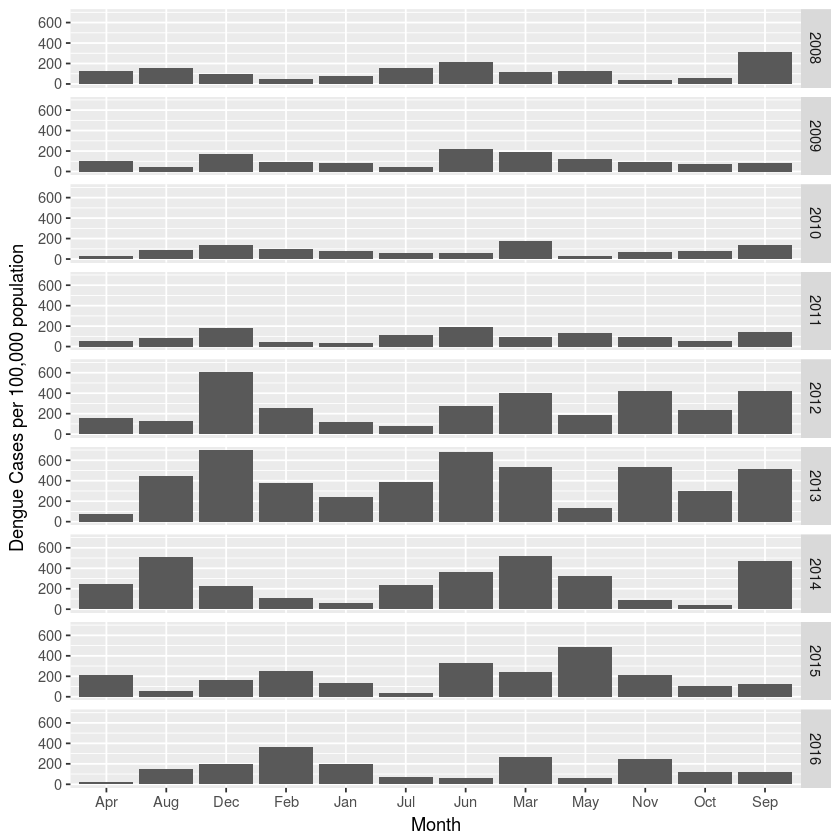

In [29]:
ggplot(data, aes(x = Month, y = Dengue_Cases)) +
    geom_bar(stat = "identity") +
    facet_grid(Year ~ .) +
    ylab("Dengue Cases per 100,000 population")

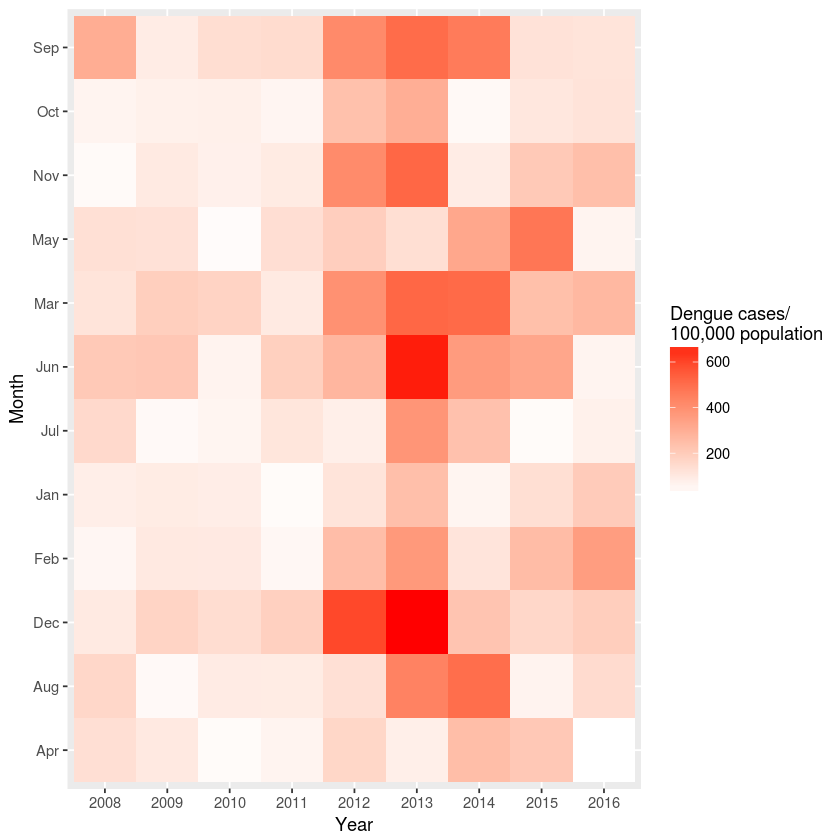

In [35]:
data %>%
    group_by(Year, Month) %>%
    summarise(Total_Cases = sum(Dengue_Cases)) %>%
    ggplot(aes(Year,Month,fill=Total_Cases)) + 
    geom_tile() +
    scale_fill_gradient(low = "white", high = "red", name = "Dengue cases/ \n100,000 population") +
    xlab(label="Year") + 
    ylab(label="Month")

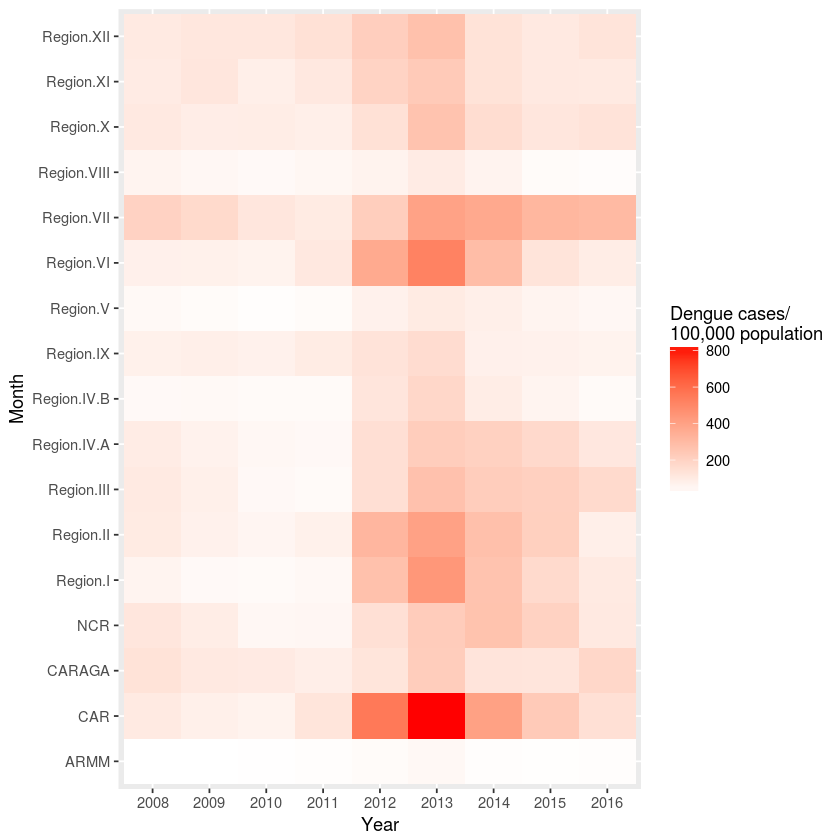

In [36]:
data %>%
    group_by(Year, Region) %>%
    summarise(Total_Cases = sum(Dengue_Cases)) %>%
    ggplot(aes(Year,Region,fill=Total_Cases)) + 
    geom_tile() +
    scale_fill_gradient(low = "white", high = "red", name = "Dengue cases/ \n100,000 population") +
    xlab(label="Year") + 
    ylab(label="Month") 

In [38]:
total_cases <- data %>%
    group_by(Year, Month) %>%
    summarise(Total_Cases = sum(Dengue_Cases))

In [39]:
total_cases_ts <- ts(total_cases$Total_Cases, start=c(2008,1), end=c(2016,12), frequency=12) 

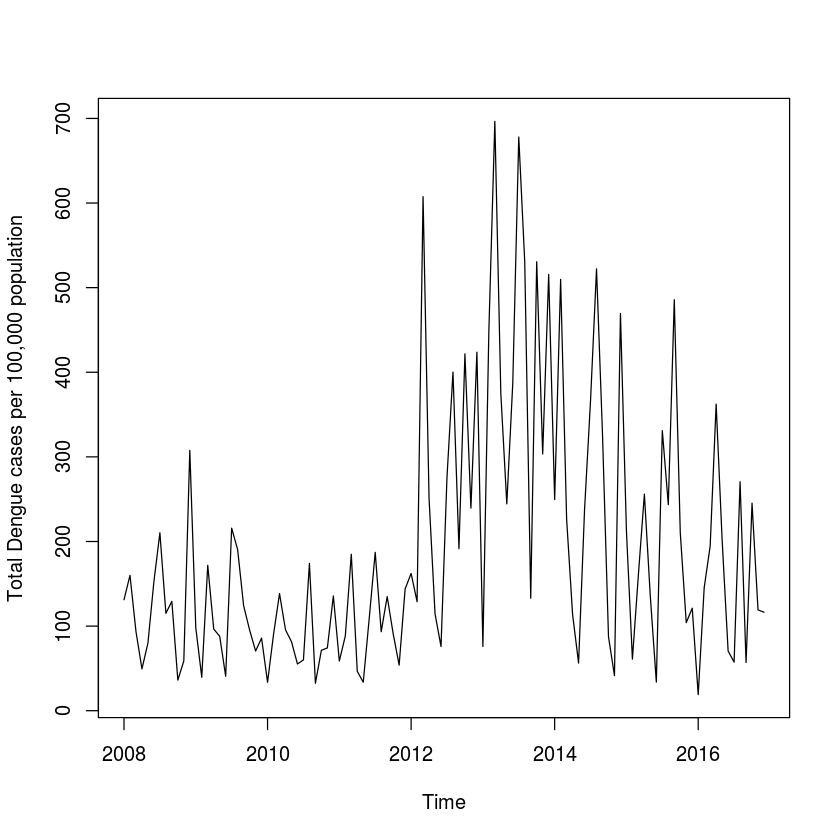

In [41]:
plot(total_cases_ts, ylab = "Total Dengue cases per 100,000 population")

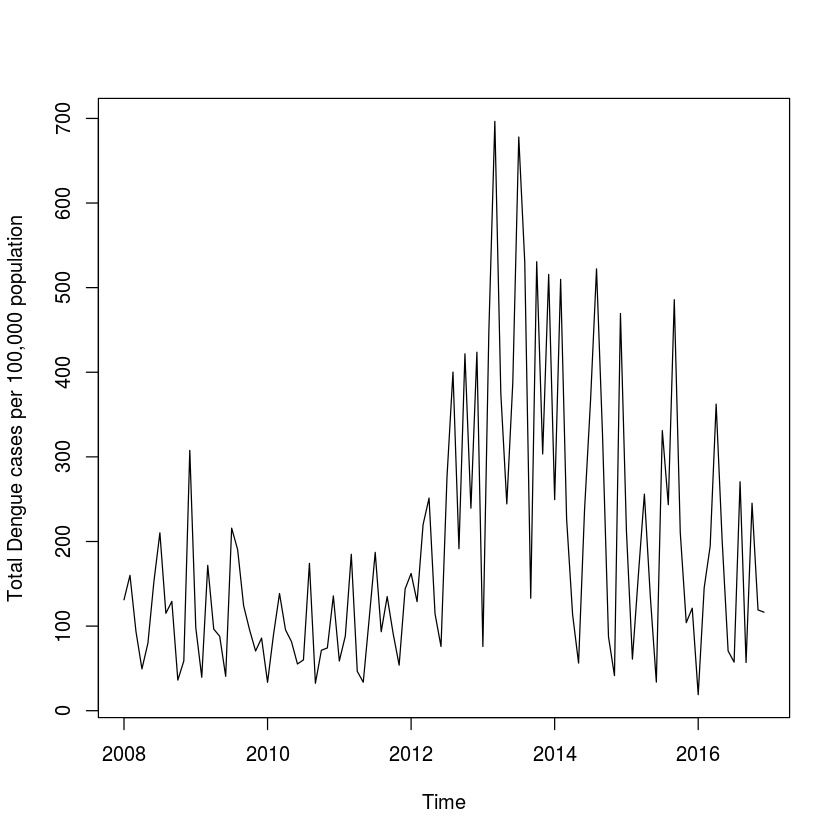

In [43]:
plot(clean_count, ylab = "Total Dengue cases per 100,000 population")

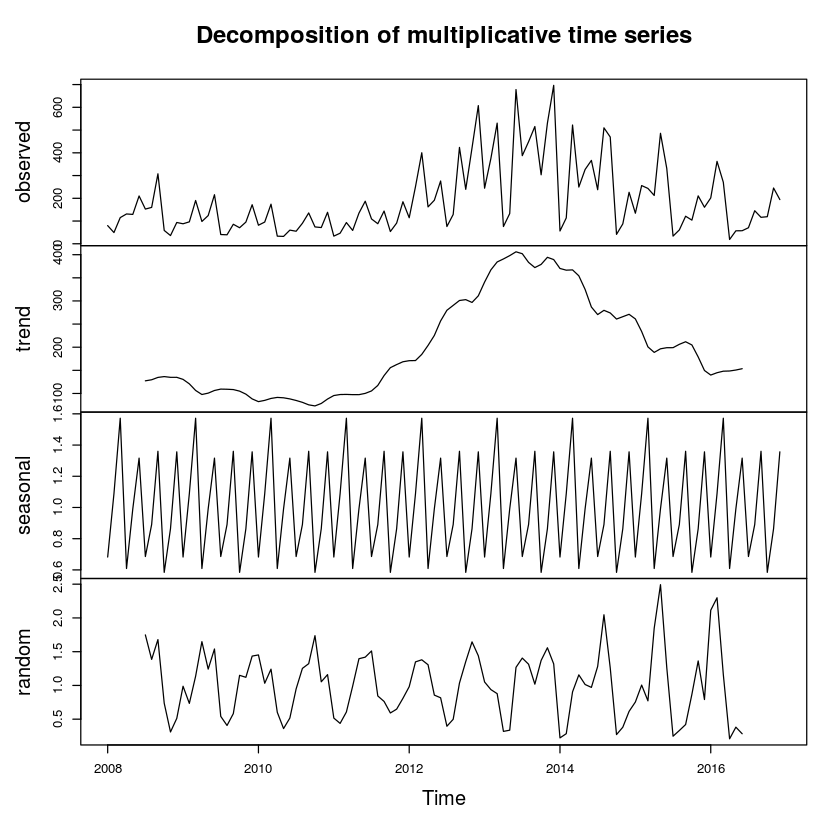

In [32]:
plot(decompose(total_cases_ts, type="mult"))